In [1]:
%run 'effLib.ipynb'


Loading Eff Lib


In [2]:
fka = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/K_Plus_0.root" )
fkb = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/K_Minus_0.root" )
fpia = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Plus_0.root" )
fpib = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Minus_0.root" )
fPa = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/P_0.root" )
fPb = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/P_Bar_0.root" )

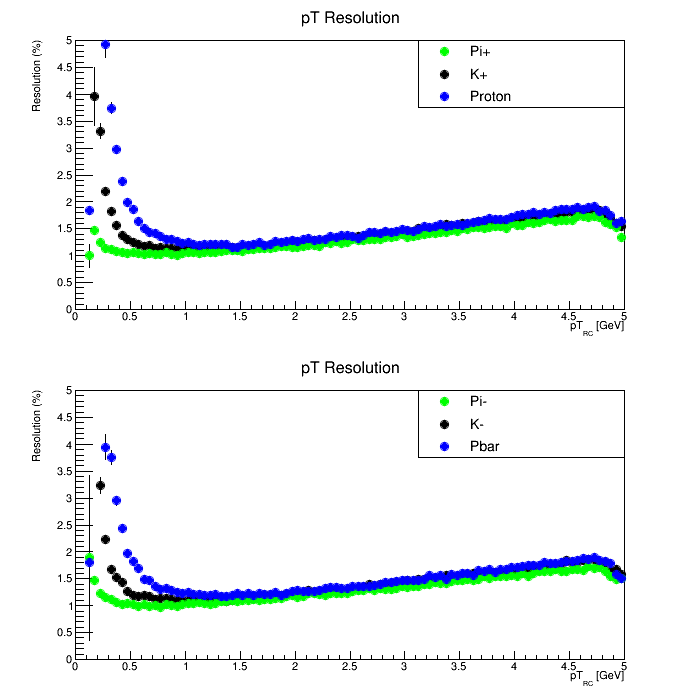

In [7]:
def mmtmRes( f, name, c ) :
    hptr = f.ptRes2
    nrex = ROOT.TObjArray()
    hptr.FitSlicesY( 0, 0, -1, 0, "QNR", nrex)
    hr = nrex[2].Clone( name )
    hr.Scale(100)
    hr.SetTitle( "pT Resolution; pT_{RC} [GeV]; Resolution (%)" )
    hr.SetMarkerColor( c )
    return hr

ROOT.gStyle.SetOptStat( 0 )
c2=Canvas( width=700, height=700 )
c2.Clear()
c2.Divide( 1, 2 )
c2.cd(1)

kRes = mmtmRes( fka, "k_res", 1 )
kRes.GetYaxis().SetRangeUser(0, 5)
kRes.Draw()
piRes = mmtmRes( fpia, "pi_res", 3 )
piRes.Draw("same")
pRes = mmtmRes( fPa, "p_res", 4 )
pRes.Draw("same")

leg = ROOT.TLegend(0.6,0.7,0.9,0.9);
leg.AddEntry( piRes, "Pi+" )
leg.AddEntry( kRes, "K+" )
leg.AddEntry( pRes, "Proton" )
leg.Draw("same")

c2.cd(2)
kmRes = mmtmRes( fkb, "km_res", 1 )
kmRes.GetYaxis().SetRangeUser(0, 5)
kmRes.Draw()
pimRes = mmtmRes( fpib, "pim_res", 3 )
pimRes.Draw("same")
pbRes = mmtmRes( fPb, "pm_res", 4 )
pbRes.Draw("same")

leg = ROOT.TLegend(0.6,0.7,0.9,0.9);
leg.AddEntry( pimRes, "Pi-" )
leg.AddEntry( kmRes, "K-" )
leg.AddEntry( pbRes, "Pbar" )
leg.Draw("same")

c2.Print( "./ptResAll.pdf" )
c2.Print( "./ptResAll.eps" )
c2